In [33]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2

In [34]:
data_path = '/home/panding/code/UR/piv-data/baseline-multimodel'
datas = glob.glob(os.path.join(data_path, '*.npy'))
randomidx = np.random.permutation(len(datas))
datas = [datas[i] for i in randomidx]
print(datas)

['/home/panding/code/UR/piv-data/baseline-multimodel/JHTDB_channel_hd_00420.npy', '/home/panding/code/UR/piv-data/baseline-multimodel/backstep_Re1000_00511.npy', '/home/panding/code/UR/piv-data/baseline-multimodel/backstep_Re800_00406.npy', '/home/panding/code/UR/piv-data/baseline-multimodel/SQG_01260.npy', '/home/panding/code/UR/piv-data/baseline-multimodel/JHTDB_channel_01389.npy', '/home/panding/code/UR/piv-data/baseline-multimodel/backstep_Re800_00374.npy', '/home/panding/code/UR/piv-data/baseline-multimodel/JHTDB_isotropic1024_hd_01509.npy', '/home/panding/code/UR/piv-data/baseline-multimodel/backstep_Re1200_00855.npy', '/home/panding/code/UR/piv-data/baseline-multimodel/backstep_Re1200_00746.npy', '/home/panding/code/UR/piv-data/baseline-multimodel/backstep_Re800_00482.npy', '/home/panding/code/UR/piv-data/baseline-multimodel/JHTDB_isotropic1024_hd_01202.npy', '/home/panding/code/UR/piv-data/baseline-multimodel/cylinder_Re150_00376.npy', '/home/panding/code/UR/piv-data/baseline-m

/home/panding/code/UR/piv-data/baseline-multimodel/backstep_Re1000_00511.npy


<Figure size 640x480 with 0 Axes>

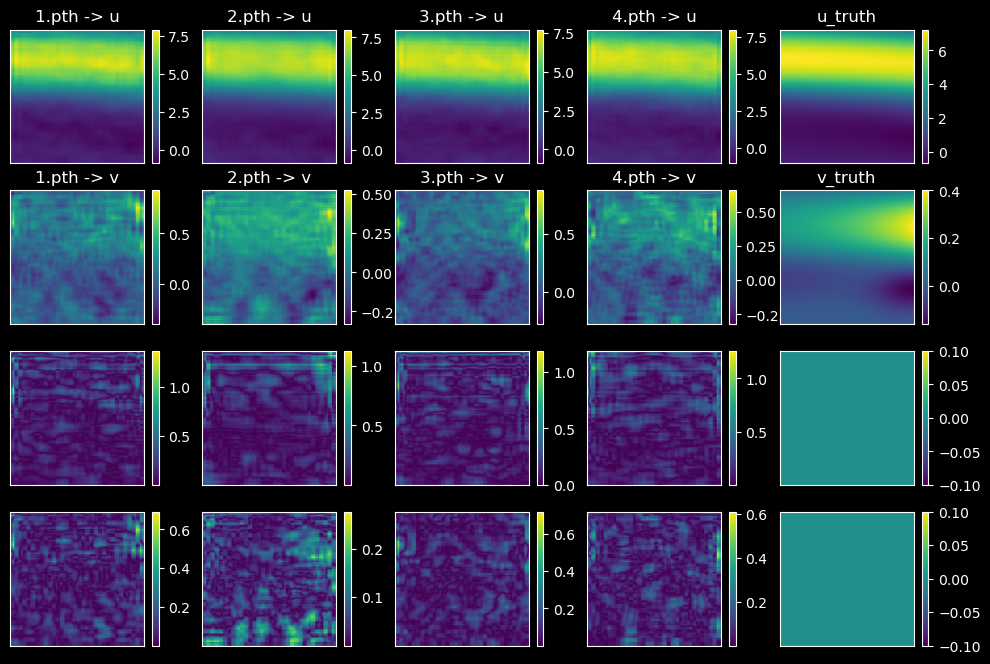

In [35]:
for i in range(1,2):
    
    data_path = datas[i]
    
    data = np.load(data_path)
    print(data_path)
    plt.figure()
    plt.figure(figsize=(12,8))
    
    plt.subplot(4, 5, 1)
    plt.title('1.pth -> u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[0])
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 2)
    plt.title('2.pth -> u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[2])
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 3)
    plt.title('3.pth -> u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[4])
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 4)
    plt.title('4.pth -> u')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[6])
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 5)
    plt.title('u_truth')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[8])
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 6)
    plt.title('1.pth -> v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[1])
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 7)
    plt.title('2.pth -> v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[3])
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 8)
    plt.title('3.pth -> v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[5])
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 9)
    plt.title('4.pth -> v')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[7])
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 10)
    plt.title('v_truth')
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[9])
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 11)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(data[0]-data[8]))
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 12)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(data[2]-data[8]))
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 13)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(data[4]-data[8]))
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 14)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(data[6]-data[8]))
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 15)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(data[8]-data[8]))
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 16)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(data[1]-data[9]))
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 17)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(data[3]-data[9]))
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 18)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(data[5]-data[9]))
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 19)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(data[7]-data[9]))
    plt.colorbar(fraction=0.05)
    
    plt.subplot(4, 5, 20)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.abs(data[9]-data[9]))
    plt.colorbar(fraction=0.05)
    
    plt.show()

In [36]:
data_path = datas[0]
    
data = np.load(data_path)
img = data[0]
print(img)
# img_rgb = np.repeat(img[:, :, np.newaxis], 3, 2)
# img_rgb = img[:, :, np.newaxis]

img = np.array(img).astype(np.uint8)
img = np.tile(img[...,None], (1, 1, 3))

# print(img1)
img = img.astype(np.uint32)
img_rgb = np.zeros((256, 256, 3), dtype=np.uint8)
img_rgb[:, :, 0] = img
img_rgb[:, :, 1] = img
img_rgb[:, :, 2] = img

    
# img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
plt.figure()
plt.imshow(img)
plt.show()
plt.figure()
plt.imshow(img_rgb)
plt.colorbar()
plt.show()
plt.figure()
plt.imshow(img)
plt.colorbar()
plt.savefig('/home/panding/code/UR/UR/baseline/rgb.png')
cv2.imwrite('/home/panding/code/UR/UR/baseline/rgb1.png', img_rgb)

[[-0.45125473 -0.45960695 -0.47364146 ... -0.00967909 -0.01476286
  -0.00947961]
 [-0.4692226  -0.4749818  -0.4820791  ... -0.01267113 -0.01014031
  -0.01351079]
 [-0.47331253 -0.48491448 -0.49032646 ... -0.01950607 -0.01237303
  -0.01994995]
 ...
 [ 0.31003863  0.3173322   0.32169896 ... -0.00829728 -0.00792404
  -0.00688722]
 [ 0.2990089   0.31095734  0.3118114  ... -0.00915614 -0.00902473
  -0.00741861]
 [ 0.29406378  0.2938831   0.29824603 ... -0.00917974 -0.00859926
  -0.00859697]]


ValueError: could not broadcast input array from shape (256,256,3) into shape (256,256)